# 手动实现SVM

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [18]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [19]:
# 将原始数据的前两个维度提取出来作为特征向量，最后一个维度提取出来作为目标
data = np.array(df.iloc[:100, [0, 1, -1]])

In [20]:
X, y = data[:,:-1], data[:,-1]

In [21]:
#将标签记作-1和1
y = np.array([1 if i == 1 else -1 for i in y])

In [22]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.01
        # self.data = data
    
    #定义感知机的模型
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    # 随机梯度下降法，请补充核心代码，如觉得此部分代码不妥，可自己定义fit函数
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for data_iris in range(len(X_train)):
                x = X_train[data_iris]
                y = y_train[data_iris]
                if y * self.sign(x, self.w , self.b) <= 0:
                    self.w += self.l_rate * np.dot(y, x)
                    self.b += self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
        
    def score(self):
        pass

In [23]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

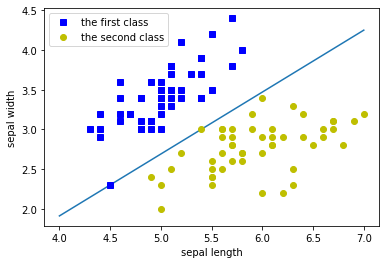

In [24]:
#画出分类线及样本点的散状图
x_points = np.linspace(4, 7, 10)
w = perceptron.w
b = perceptron.b
y_boundary = -w[0]/w[1] * x_points - b/w[1]

plt.plot(x_points,y_boundary)
plt.plot(data[:50,0], data[:50,1],"bs", label="the first class")
plt.plot(data[50:100,0], data[50:100,1], "yo", label="the second class")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# 使用scikit-learn实现Perceptron

In [25]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [26]:
clf = Perceptron(random_state=10)
clf.fit(X, y)

Perceptron(random_state=10)

In [27]:
# Weights assigned to the features.
print(clf.coef_)

[[ 24.2 -40.6]]


In [28]:
# 截距 Constants in decision function.
print(clf.intercept_)

[-6.]


In [29]:
predictions=clf.predict(X)
print(classification_report(y,predictions))

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



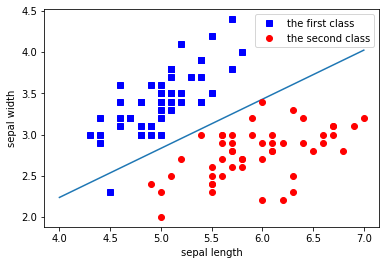

In [30]:
x_points = np.linspace(4, 7, 10) # 4,5,6,7
y_ = -(clf.coef_[0][0]* x_points + clf.intercept_)/clf.coef_[0][1] 
#画分类超平面
plt.plot(x_points,y_)
#画出训练样本点的散状图，蓝色一类，红色一类
plt.plot(data[:50,0], data[:50,1], "bs", color ="blue", label="the first class")
plt.plot(data[50:100,0], data[50:100,1], "yo", color ="red",label="the second class")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()